## CIS 600, Spring 2018
## Assignment 1: Graphs & Network Analysis
### Due: Friday, February 9
### Amritbani Sondhi, SUID: 903888517

--------------------------------------------------------------------------------------------------------------------------------

### • Implement degree, closeness, betweenness and eigenvector centrality in python. Your functions
### should take as input an adjacency matrix and return a list or vector of centrality values.
### You may focus on just undirected graphs. Do not simply invoke NetworkX functions.

#### Solution: 

#### Importing Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Creating a Graph:

In [2]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
              [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
mat_size = len(A)
print("Graph of Size", mat_size,":")
print(A)

Graph of Size 9 :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


--------------------------------------------------------------------------------------------------------------------------------

### Degree Centrality:

In [3]:
# creating a copy of Graph A:
temp = A.copy()

# to perform Summation of any Row:
def sum_of_row(graph, a):
    degSum = 0
    # Summing all columns in the row
    for column in range(mat_size):
        degSum += graph[a,column]
    return degSum
        
# Calculate Degree Centrality:
def degreeCentrality(a):
    degSum = sum_of_row(temp, a)
    # dividing the sum of the degree with the (n-1) nodes
    result = (degSum/(mat_size-1))
    
    # We return a single number.
    return result

In [4]:
# Calculate for all Nodes
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]
print("Degree Centralities of the Graph: \n", degreeCentralityValues)

Degree Centralities of the Graph: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]


--------------------------------------------------------------------------------------------------------------------------------

### Betweenness Centrality: 

Initializing Graphs and Matrices:

In [5]:
# Using NetworkX only to calculate the shortest path:
import networkx as nx

# Converting it to a NetworkX Graph:
temp_Graph = nx.from_numpy_matrix(temp)

In [6]:
# Creating a blank Step Matrix 
step_mat = np.zeros((mat_size,mat_size))
step_mat

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Calculate Step Matrix for A[pow_size]:

In [7]:
# Calculate the steps in between nodes and save it in the step matrix:
def step_betn_nodes(step_mat):
    for from_node in range(mat_size):
        for to_node in range(mat_size):
            lengthPath = nx.dijkstra_path_length(temp_Graph, from_node, to_node)
            #print("Path Length: ",lengthPath)
            step_mat[from_node][to_node] = lengthPath
            step_mat[to_node][from_node] = lengthPath

step_betn_nodes(step_mat)
print(step_mat)

[[ 0.  1.  1.  1.  2.  2.  3.  3.  4.]
 [ 1.  0.  1.  2.  3.  3.  4.  4.  5.]
 [ 1.  1.  0.  1.  2.  2.  3.  3.  4.]
 [ 1.  2.  1.  0.  1.  1.  2.  2.  3.]
 [ 2.  3.  2.  1.  0.  1.  1.  1.  2.]
 [ 2.  3.  2.  1.  1.  0.  1.  1.  2.]
 [ 3.  4.  3.  2.  1.  1.  0.  1.  1.]
 [ 3.  4.  3.  2.  1.  1.  1.  0.  2.]
 [ 4.  5.  4.  3.  2.  2.  1.  2.  0.]]


Get the maximum value in the step_matrix:

In [8]:
pow_size = int(step_mat.max())+1

__CLAIM:__ The maximum no. in the step matrix will be the A_powers iteration when the values (except in the diagonal) would be greater than zero everytime

In [9]:
# Get a list of all powers of A up through the fifth power.
# We need to stop when all entries are positive
#A_powers = [np.linalg.matrix_power(A,m) for m in [1,2,3,4,5]]
A_powers = [np.linalg.matrix_power(A,m) for m in range(1,pow_size)]

In [10]:
A_powers

[array([[0, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 1, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0]]), array([[3, 1, 2, 1, 1, 1, 0, 0, 0],
        [1, 2, 1, 2, 0, 0, 0, 0, 0],
        [2, 1, 3, 1, 1, 1, 0, 0, 0],
        [1, 2, 1, 4, 1, 1, 2, 2, 0],
        [1, 0, 1, 1, 4, 3, 2, 2, 1],
        [1, 0, 1, 1, 3, 4, 2, 2, 1],
        [0, 0, 0, 2, 2, 2, 4, 2, 0],
        [0, 0, 0, 2, 2, 2, 2, 3, 1],
        [0, 0, 0, 0, 1, 1, 0, 1, 1]]), array([[ 4,  5,  5,  7,  2,  2,  2,  2,  0],
        [ 5,  2,  5,  2,  2,  2,  0,  0,  0],
        [ 5,  5,  4,  7,  2,  2,  2,  2,  0],
        [ 7,  2,  7,  4,  9,  9,  4,  4,  2],
        [ 2,  2,  2,  9,  8,  9, 10,  9,  2],
        [ 2,  2,  2,  9,  9,  8, 10,  9,  2],
        [ 2,  0,  2,  4, 10, 10,  6,  8,  4],
        [ 

Compute the __sigma values__ for nodes i and j, __with no middle node__ considered:

In [11]:
# Define a matrix. Next, we will fill it up entry by entry:
sigma = np.zeros((mat_size,mat_size))
sigma

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

__CLAIM:__ The length of a shortest path from i to j is the smallest m such that the i,j entry of A^m is nonzero. Therefore, the number of shortest paths from i to j is the i,j entry of A^m for this particular m.

use a nested loop to build sigma. Also __keep track of the minimal lengths for each pair of nodes.__

In [12]:
min_lengths = np.zeros((mat_size,mat_size))
min_lengths

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [13]:
for i in range(mat_size):
    for j in range(mat_size):
        for x in range(pow_size-1):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

Now compute the other terms, which depend on one node at a time. So, let's __repeat the above calculation with node j isolated from the rest of the graph, then subtract.__

In [14]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(mat_size)
    B[:,j] = np.zeros(mat_size)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]] ##[1,2,3,4,5]]
    B_sigma = np.zeros((mat_size,mat_size))
    B_min_lengths = np.zeros((mat_size,mat_size))
    for i in range(mat_size):
        for k in range(mat_size):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)

Define a function that takes a node number and returns its betweenness centrality value!

In [15]:
def betweenness_centrality(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(mat_size):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [16]:
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Betweenness Centralities of the Graph: \n", betweennessCentralityValues)

Betweenness Centralities of the Graph: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]


--------------------------------------------------------------------------------------------------------------------------------

### Closeness Centrality:

In [17]:
def closenessCentrality(b):
    closeSum = sum_of_row(step_mat, b)
    
    # dividing the (n-1) nodes with the sum of the closeness_values 
    result = ((mat_size-1)/closeSum)
    
    # We return a single number.
    return result

In [18]:
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Closeness Centralities of the Graph: \n", closenessCentralityValues)

Closeness Centralities of the Graph: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.61538461538461542, 0.61538461538461542, 0.61538461538461542, 0.5, 0.47058823529411764, 0.34782608695652173]


--------------------------------------------------------------------------------------------------------------------------------

### Eigenvector Centrality:

Computing Eigen Values and Eigen Vector of the Graph

In [19]:
# Calculating Eigens of the graph
w,v = np.linalg.eig(temp)

In [20]:
# The eigenvalues of the graph
#print("Eigen Values of the Graph: \n",w)

# The eigenvectors of the graph
#print("Eigen Values of the Graph: \n",v)

Getting the maximum absolute Eigen Value and it's respective Eigen Vector

In [21]:
# Index of the Maximum Absolute Eigen Value of the graph
index = (np.abs(max(w, key=abs))).argmax()

# Respective Eigen Vector of the maximum Eigen Value
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]

print("Eigen Vector Centralities of the Graph: \n", eigenCentralityValues)

Eigen Vector Centralities of the Graph: 
 [0.19574879570918419, 0.1116837032398663, 0.19574879570918396, 0.37874802533567853, 0.46808547631042252, 0.46808547631042252, 0.40997938953295338, 0.3840203838411051, 0.11695606174529273]


--------------------------------------------------------------------------------------------------------------------------------

### Comparing the Computed values with the Networkx solutions: 

In [22]:
# Converting the graph to a NetworkX Graph:
H = nx.from_numpy_matrix(A)

In [23]:
print("------------------------------------------------------------------------------------------------------------------------")
degreeCentralityValues = [degreeCentrality(a) for a in range(mat_size)]
print("Calculated Degree Centralities: \n", degreeCentralityValues)
print("\nNetworkX Degree Centralities: \n", nx.degree_centrality(H))

print("------------------------------------------------------------------------------------------------------------------------")
betweennessCentralityValues = [betweenness_centrality(x) for x in range(mat_size)]
print("Calculated Betweenness Centralities: \n", betweennessCentralityValues)
print("\nNetworkX Betweenness Centralities: \n", nx.betweenness_centrality(H, normalized=False).values())

print("------------------------------------------------------------------------------------------------------------------------")
closenessCentralityValues = [closenessCentrality(b) for b in range(mat_size)]
print("Calculated Closeness Centralities: \n", closenessCentralityValues)
print("\nNetworkX Closeness Centralities: \n", nx.closeness_centrality(H))

print("------------------------------------------------------------------------------------------------------------------------")
eigenCentralityValues = [v[ecv,index] for ecv in range(mat_size)]
print("Calculated Eigen Vector Centralities: \n", eigenCentralityValues)
print("\nNetworkX Eigen Vector Centralities: \n", nx.eigenvector_centrality(H))
print("------------------------------------------------------------------------------------------------------------------------")


------------------------------------------------------------------------------------------------------------------------
Calculated Degree Centralities: 
 [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

NetworkX Degree Centralities: 
 {0: 0.375, 1: 0.25, 2: 0.375, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.375, 8: 0.125}
------------------------------------------------------------------------------------------------------------------------
Calculated Betweenness Centralities: 
 [3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

NetworkX Betweenness Centralities: 
 dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])
------------------------------------------------------------------------------------------------------------------------
Calculated Closeness Centralities: 
 [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.61538461538461542, 0.61538461538461542, 0.61538461538461542, 0.5, 0.47058823529411764, 0.34782608695652173]

NetworkX Closeness Centralities: 
 {0

--------------------------------------------------------------------------------------------------------------------------------

### • Create a function that takes as input an adjacency matrix and plots in the notebook a
### depiction of the associated graph with eigenvector centrality represented by node size. Nodes
### should be represented as circles. In other words, learn how to produce diagrams like given in the notebook
#### Solution:

In [24]:
def plot_Eigen_Graph(adj_matrix): 
    # Create number for each group to allow use of colormap
    from itertools import count
    
    # Converting the graph to a NetworkX Graph:
    temp = nx.from_numpy_matrix(adj_matrix)

    #Calculating Eigenvector Centrality Values:
    eigenValues = nx.eigenvector_centrality(H)

    graphH = eigenValues

    # Rounding the values
    for key, value in graphH.items():
        graphH[key] = round(value,4)
    
    # Creating the legend
    labelList = []
    for lbl in range(len(graphH)):
        lblName = str(lbl+1) + ': ' + str(graphH.get(lbl,"none"))
        labelList.append(lblName)
    print("Legend with Eigen Vector Centralities: \n", labelList)
    
    # Increase the node spacing
    pos = nx.spring_layout(graphH)
    
    # Grouping the nodes according to the Centrality values for reflecting in color
    groups = set(graphH.values())
    mapping = dict(zip(sorted(groups),count()))
    colors = [mapping[graphH.get(n,"none")] for n in graphH.keys()]

    # Specify the Plot parameters
    nx.draw_networkx(H, pos, nodelist=graphH.keys(), node_color= colors, with_labels=True, 
                     node_size=[(v) * 3000 for v in graphH.values()])
    
    plt.axis('off')
    plt.show()

Legend with Eigen Vector Centralities: 
 ['1: 0.1958', '2: 0.1117', '3: 0.1958', '4: 0.3788', '5: 0.4681', '6: 0.4681', '7: 0.41', '8: 0.384', '9: 0.117']


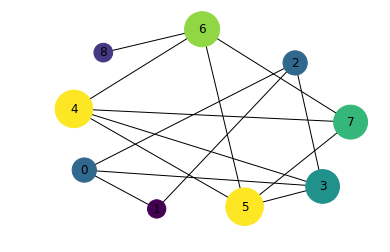

In [25]:
plot_Eigen_Graph(A)